### Problem 3: RSSI Model

In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt 

In [2]:
def calculate_distance(a : list, b : list) -> float:
    assert len(a) == 3 and len(b) == 3 , "3 dimensional coordinates should be provided"
    distance = round(np.sqrt(np.sum(np.square(np.subtract(a,b)))), 3)
    return distance

In [3]:
#parameters
n = 4    #path loss parameter 
A = -50  # avg measured RSSI whern the received node is 1m away from transmitting node

#Coordinates for Wireless devices
device1_coords = [0, 30, 3] 
device2_coords = [50, 60, 4]
device3_coords = [100, 30, 3]

RSSI distance measurement generally uses the logarithmic distance path-loss
model. It is expressed as 
    RSSI = -10nlog(d/d_0) + A + X_sigma

For convenience of calculation, d0 usually takes a value of 1 meter. Since Xs has a mean of 0,
the distance-loss model can be obtained with
    RSSI  = -10nlog(d) + A`
    
where A` where A is the average measured RSSI when the received node is 1 meter away from the transmit
node

In [4]:
def calculate_RSSI(n : int , distance : float, A : int ) -> float:
    rssi = round( (-10*n*math.log(distance) + A), 3 )
    return rssi

#### 1. Generate an RSSI profile as a function of the distance d, for d=1 to 140m :

In [5]:
rssi_profile = list()

for d in range(1,141):
    rssi_profile.append(calculate_RSSI(n, d, A))
    
print(f'RSSI profile values for d = 1 to 140 are : \n {rssi_profile}')

RSSI profile values for d = 1 to 140 are : 
 [-50.0, -77.726, -93.944, -105.452, -114.378, -121.67, -127.836, -133.178, -137.889, -142.103, -145.916, -149.396, -152.598, -155.562, -158.322, -160.904, -163.329, -165.615, -167.778, -169.829, -171.781, -173.642, -175.42, -177.122, -178.755, -180.324, -181.833, -183.288, -184.692, -186.048, -187.359, -188.629, -189.86, -191.054, -192.214, -193.341, -194.437, -195.503, -196.542, -197.555, -198.543, -199.507, -200.448, -201.368, -202.266, -203.146, -204.006, -204.848, -205.673, -206.481, -207.273, -208.05, -208.812, -209.559, -210.293, -211.014, -211.722, -212.418, -213.101, -213.774, -214.435, -215.085, -215.725, -216.355, -216.975, -217.586, -218.188, -218.78, -219.364, -219.94, -220.507, -221.067, -221.618, -222.163, -222.7, -223.229, -223.752, -224.268, -224.778, -225.281, -225.778, -226.269, -226.754, -227.233, -227.706, -228.174, -228.636, -229.093, -229.545, -229.992, -230.434, -230.872, -231.304, -231.732, -232.155, -232.574, -232.98

In [6]:
print(f' Mean of RSSI profile is : {np.mean(rssi_profile)}')
print(f' Standard deviation of RSSI profile is : {np.std(rssi_profile)}')

 Mean of RSSI profile is : -208.63434285714283
 Standard deviation of RSSI profile is : 37.5537969597847


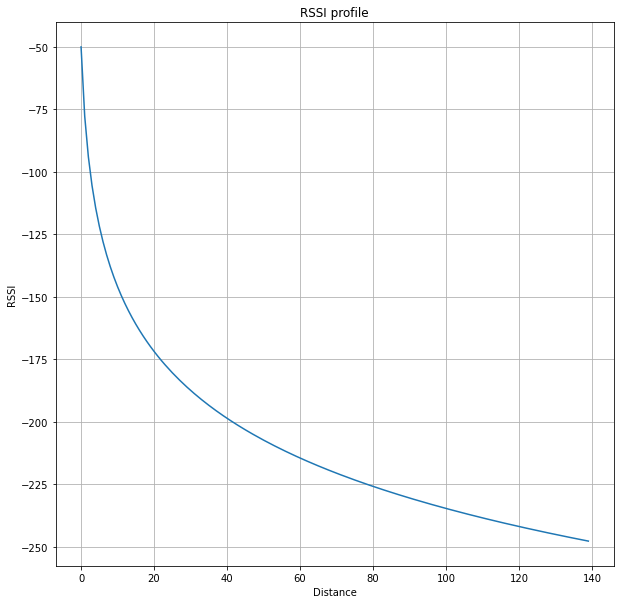

In [7]:
plt.figure(figsize = (10,10))
plt.plot(rssi_profile)
plt.xlabel('Distance')
plt.ylabel('RSSI')
plt.title('RSSI profile')
plt.grid()
plt.show()

#### 2. Generate the fingerprint for the tile grid. Each grid tile fingerprint is the RSSI readings from the three devices measured at that particular tile. Use the center of the tile for your calculations

In [8]:
def calculate_RSSI_PLM(distance : float, n: int = 4, A : int = -50) -> float :
    """
    RSSI is modeleled using path loss model, incorporates the 
    random normal noise signal with mean = 0 and sd = 5.1 (given)
    
    Args :
        n: path loss parameter , default value of 4 
        A: avg measured RSSI whern the received node is 1m away from transmitting node , default value of -50 
        distance : coordinates of tile
        
    Returns :
        RSSI value of float type
    """
    mean = 0
    sd = 5.1
    op_size = 1 #ouput size
    X_sigma = np.random.normal(mean, sd, op_size)[0]
    #print(f'X_sigma is :{X_sigma}')
    rssi_plm = round( (-10*n*math.log(distance) + A + X_sigma), 3 )
    return rssi_plm

In [9]:
def fingerprint(coords : list, device1_coords : float, device2_coords : list, device3_coords : float) -> list:
    """
    Calcualtes 3 RSSI value at given coordinates with respect to 3 wireless devices.
    Makes use of `calculate distance` method to calculates distance
    
    Args :
        coords : grid tile location
        device1_coords : Coordinates of wireless device 1
        device1_coords : Coordinates of wireless device 2
        device1_coords : Coordinates of wireless device 3
        
    Returns :
        List of 3 calculated RSSI values [rssi_1, rssi_2, rssi_3]
        
    """
    rssi_1 = calculate_RSSI_PLM(distance = calculate_distance(coords, device1_coords))
    rssi_2 = calculate_RSSI_PLM(distance = calculate_distance(device1_coords, device2_coords))
    rssi_3 = calculate_RSSI_PLM(distance = calculate_distance(device2_coords, device3_coords))
    return [rssi_1, rssi_2, rssi_3]

In [10]:
def generate_grid(min_of_grid, max_of_grid):
    """
        Building of a rectangular shape: 100mx60mx5m
        The floor of the building is a grid of equal size square-tiles.
        It suffices to locate the device roaming inside the building in terms of a tile index.
        Each tile is assumed to be 1*1 and each tile would be characterized by index in grid
    """
    
    tile_centres = list()
    for x in np.arange(min_of_grid[0], max_of_grid[0], 1):
        for y in np.arange(min_of_grid[1], max_of_grid[1], 1):
            #print(x, y)
            tile_centres.append([x,y,0]) #zero to retain 3D coordinate system
    return tile_centres

In [11]:
min_of_grid, max_of_grid = [0.5, 0.5], [100, 60]
grid_tile_centre_coords = generate_grid(min_of_grid, max_of_grid)

In [12]:
grid_tile_centre_coords[:10]

[[0.5, 0.5, 0],
 [0.5, 1.5, 0],
 [0.5, 2.5, 0],
 [0.5, 3.5, 0],
 [0.5, 4.5, 0],
 [0.5, 5.5, 0],
 [0.5, 6.5, 0],
 [0.5, 7.5, 0],
 [0.5, 8.5, 0],
 [0.5, 9.5, 0]]

In [13]:
np.array(grid_tile_centre_coords)[:,0]

array([ 0.5,  0.5,  0.5, ..., 99.5, 99.5, 99.5])

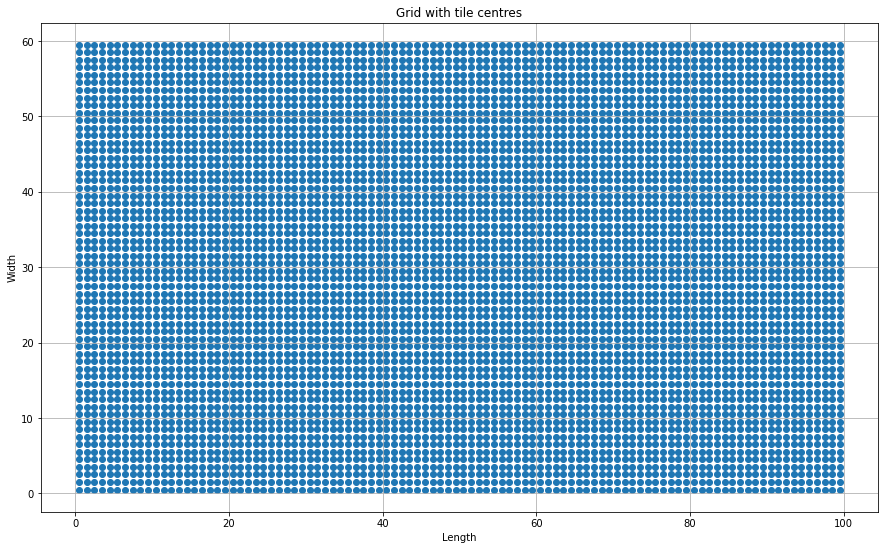

In [14]:
plt.figure(figsize = (15,9))
plt.scatter(np.array(grid_tile_centre_coords)[:,0], np.array(grid_tile_centre_coords)[:,1])
plt.xlabel('Length')
plt.ylabel('Width')
plt.title('Grid with tile centres')
plt.grid()
plt.show()

In [15]:
grid_fingerprint = list()

for d in range(len(grid_tile_centre_coords)):
    grid_fingerprint.append(fingerprint(grid_tile_centre_coords[d], device1_coords, device2_coords, device3_coords))

print(f'Shape of grid fingerprint is : {np.array(grid_fingerprint).shape}')

df_fingerprint = pd.DataFrame(np.array(grid_fingerprint))
print(f'Fingerprint for grid is as follows: \n {df_fingerprint.head(5)}')
df_fingerprint.to_csv(r'A3_q2_2.csv')

Shape of grid fingerprint is : (6000, 3)
Fingerprint for grid is as follows: 
          0        1        2
0 -188.183 -218.902 -217.348
1 -185.677 -220.091 -210.835
2 -176.842 -207.828 -209.997
3 -188.351 -204.181 -220.859
4 -186.889 -214.920 -202.021


#### 3. Consider a roaming device, placed at the centre of tile indexed by (30 on the x-dimension, 45 on the y-dimension,0 on the z-dimension). Estimate the RSSI readings using the same model.

In [16]:
roaming_device_coords = [30, 45, 0]
print(f'RSSI for roaming device is : {fingerprint(roaming_device_coords, device1_coords, device2_coords, device3_coords)}')

RSSI for roaming device is : [-184.777, -218.98, -210.027]


#### 4. Compute the tile location of the roaming device by matching its RSSI readings as in 3 above, with that stored in the grid fingerprint. Repeat this ten times and compute the mean location value. 

In [17]:
f = np.array(grid_fingerprint)

In [18]:
[f[0]]

[array([-188.183, -218.902, -217.348])]

In [19]:
def location(f : list, r : list):
    """
        Compute the tile location of the roaming device by matching its RSSI readings,
        with that stored in the grid fingerprint RSSI values list
        
    Args :
        f: grid fingerprint RSSI values list
        r : rssi value for roaming device
        
    Returns :
        tile location :index of tile in grid and roaming matching rssi
    """
    roaming_device_tile_match_index = 0
    roaming_device_rssi_match = [f[0]] #start point for comparing
    
    rssi_diff = math.sqrt((r[0] - f[0][0])**2 + (r[1] - f[0][1])**2 + (r[2] - f[0][2])**2)
    
    for i in range(len(f)):
        if rssi_diff > (math.sqrt((r[0] - f[i][0])**2 + (r[1] - f[i][1])**2 + (r[2] - f[i][2])**2)):
            roaming_device_tile_match_index = i
            roaming_device_rssi_match = [f[i]]
            rssi_diff = math.sqrt((r[0] - f[i][0])**2 + (r[1] - f[i][1])**2 + (r[2] - f[i][2])**2)
    return roaming_device_tile_match_index, roaming_device_rssi_match

In [20]:
roamimg_index_rssi_list = []
roaming_tile_matching_index = []
roaming_tile_rssi = []
grid_centre_match_coords = []

for i in range(10):
    roaming_rssi = fingerprint(roaming_device_coords, device1_coords, device2_coords, device3_coords)
    roamimg_index_rssi_list.append(location(np.array(grid_fingerprint), roaming_rssi))
for i in range(10):
    roaming_tile_matching_index.append(roamimg_index_rssi_list[i][0])
    roaming_tile_rssi.append(roamimg_index_rssi_list[i][1])
    grid_centre_match_coords.append(grid_tile_centre_coords[roamimg_index_rssi_list[i][0]])

print(f'Grid tile centre coordinates for 10 runs are : \n {grid_centre_match_coords}')
print(f'RSSI for 10 runs are : \n {roaming_tile_rssi}')

mean_location = np.mean(np.array(grid_centre_match_coords), axis =0)
print(f'Mean location value is : {mean_location}')

Grid tile centre coordinates for 10 runs are : 
 [[27.5, 50.5, 0], [4.5, 5.5, 0], [29.5, 49.5, 0], [17.5, 57.5, 0], [39.5, 28.5, 0], [25.5, 34.5, 0], [25.5, 54.5, 0], [36.5, 36.5, 0], [43.5, 14.5, 0], [31.5, 37.5, 0]]
RSSI for 10 runs are : 
 [[array([-191.386, -220.12 , -203.637])], [array([-185.187, -211.822, -211.257])], [array([-185.766, -222.48 , -206.215])], [array([-178.556, -215.243, -216.645])], [array([-190.831, -203.516, -215.303])], [array([-180.5  , -205.732, -214.47 ])], [array([-194.236, -207.582, -213.677])], [array([-193.197, -210.486, -215.345])], [array([-193.468, -213.691, -217.433])], [array([-187.88 , -214.908, -208.346])]]
Mean location value is : [28.1 36.9  0. ]


#### 5. Compute the location error, i,e, the distance between the true tile location and the mean location value

In [21]:
r = roaming_device_coords = [30, 45, 0]
location_error = np.sqrt((mean_location[0] - r[0])**2 + (mean_location[1] - r[1])**2 +(mean_location[2] - r[2])**2)
print(f'Location error is : {round(location_error, 3)}')

Location error is : 8.32


#### 6. Using the estimated reading in 3 above and the RSSI model, compute the distance between the roaming device and each wireless anchor. Use a triangulation technique to estimate the three dimensional location of the roaming device. Compare that to true location.

In [22]:
def distance_for_trilateration(roaming_device_rssi):
    dist_A = math.exp((A - roaming_device_rssi[0])/ (10*n))
    dist_B = math.exp((A - roaming_device_rssi[1])/ (10*n))
    dist_C = math.exp((A - roaming_device_rssi[2])/ (10*n))
    return dist_A, dist_B, dist_C

In [23]:
roaming_device_rssi = fingerprint(roaming_device_coords, device1_coords, device2_coords, device3_coords)

In [24]:
def calcualte_trilateration(device1_coords, device2_coords, device3_coords, r1, r2, r3):

    p1 = np.array([0, 0, 0])
    p2 = np.array([device2_coords[0] - device1_coords[0], device2_coords[1] - device1_coords[1], device2_coords[2] - device1_coords[2]])
    p3 = np.array([device3_coords[0] - device1_coords[0], device3_coords[1] - device1_coords[1], device3_coords[2] - device1_coords[2]])
    v1 = p2 - p1
    v2 = p3 - p1

    Xn = (v1)/np.linalg.norm(v1)

    tmp = np.cross(v1, v2)

    Zn = (tmp)/np.linalg.norm(tmp)

    Yn = np.cross(Xn, Zn)

    i = np.dot(Xn, v2)
    d = np.dot(Xn, v1)
    j = np.dot(Yn, v2)

    X = ((r1**2)-(r2**2)+(d**2))/(2*d)
    Y = (((r1**2)-(r3**2)+(i**2)+(j**2))/(2*j))-((i/j)*(X))
    Z1 = np.sqrt(max(0, r1**2-X**2-Y**2))
    Z2 = -Z1

    K1 = device1_coords + X * Xn + Y * Yn + Z1 * Zn
    return abs(K1)

In [25]:
r1, r2, r3 = distance_for_trilateration(roaming_device_rssi)
trilaterated_location = calcualte_trilateration(device1_coords, device2_coords, device3_coords, r1, r2, r3)

In [26]:
print(f'Trilaterated location is : {trilaterated_location}')

Trilaterated location is : [43.16939551 27.50794352  1.08306855]


In [27]:
roaming_device_coords = [30, 45, 0]
trilateration_location_error = np.sqrt((trilaterated_location[0] - r[0])**2 + (trilaterated_location[1] - r[1])**2 +(trilaterated_location[2] - r[2])**2)
print(f'Location error using trilateration method is : {round(trilateration_location_error, 3)}')

Location error using trilateration method is : 21.922


### References:

[1]. Retrieved from URL: https://stackoverflow.com/questions/56058383/i-want-to-implement-trilateration-in-python-i-cant-t-find-what-is-wrong-with-m